In [254]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [255]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c
from my_code import helper_functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1002-sweep_6h_e_1qm_oi-1

In [256]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='1002',
    file_name='sweep_6h_e_1qm_oi-1',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'ansatz', 'block_n_layers', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'loss_validation_r_squared', 'n_parameters', 'time_train', 'best_oi', 'best_oi_score', 'oi_time'])

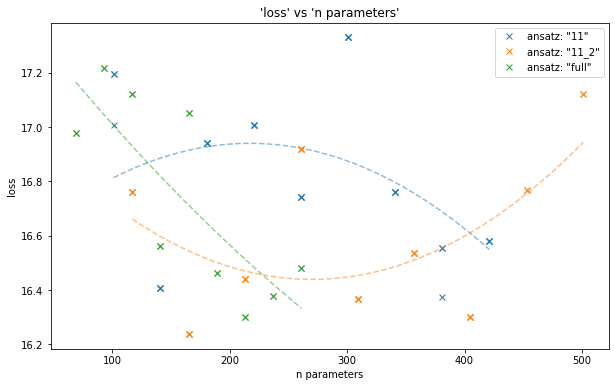

In [257]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation',
    legend_keys=['ansatz'],
    fit_degree=2,
    replace=[
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11'>", '11'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11_2'>", '11_2'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_full_conn'>", 'full'),
        ('loss_validation', 'loss'),        
        ('n_parameters', 'n parameters'),

    ],
    fix = [],
    to_string=['ansatz'],
)

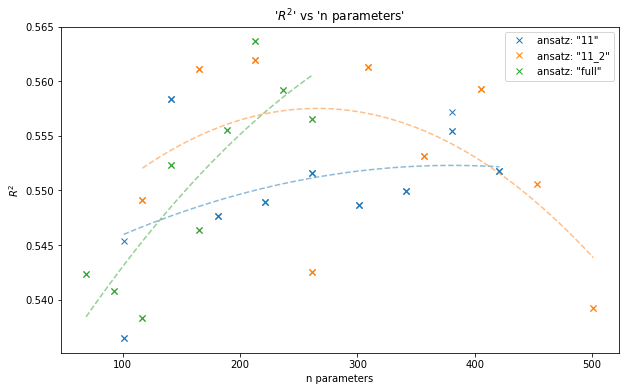

In [258]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation_r_squared',
    legend_keys=['ansatz'],
    fit_degree=2,
    replace=[
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11'>", '11'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11_2'>", '11_2'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_full_conn'>", 'full'),
        ('loss_validation_r_squared', '$R^2$'),
        ('loss_validation', 'loss'),        
        ('n_parameters', 'n parameters'),

    ],
    fix = [],
    to_string=['ansatz'],
)

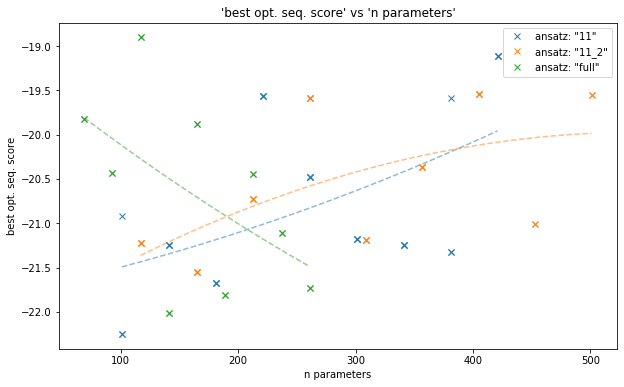

In [259]:
sweep.plot(
    x_key='n_parameters',
    y_key='best_oi_score',
    legend_keys=['ansatz'],
    fit_degree=2,
    replace=[
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11'>", '11'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11_2'>", '11_2'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_full_conn'>", 'full'),
        ('best_oi_score', 'best opt. seq. score'),
        ('n_parameters', 'n parameters'),
    ],
    fix = [],
    to_string=['ansatz'],
)

In [260]:
flat_ois = sweep.arrays['best_oi'].flatten()
flat_ois_letters = [f.number_to_letter[o] for o in flat_ois]

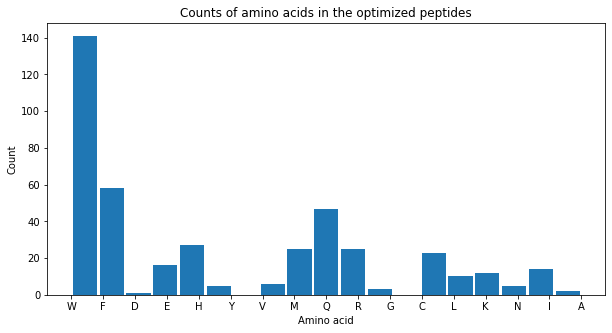

In [261]:
#histogram flat ois can have 19 different values
plt.figure(figsize=(10,5))
plt.hist(flat_ois_letters, bins=19, rwidth=0.9)
plt.title('Counts of amino acids in the optimized peptides')
plt.xlabel('Amino acid')
plt.ylabel('Count')
plt.show()

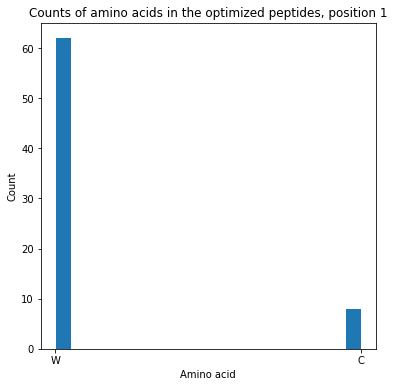

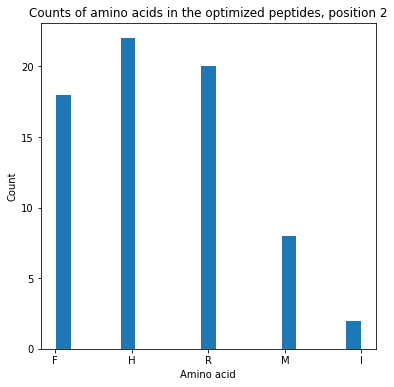

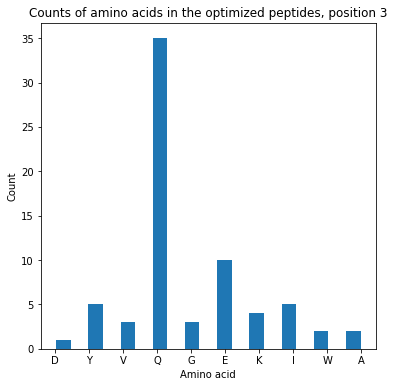

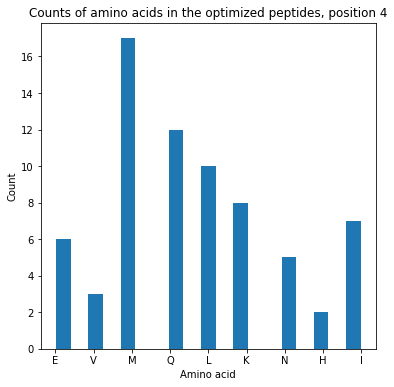

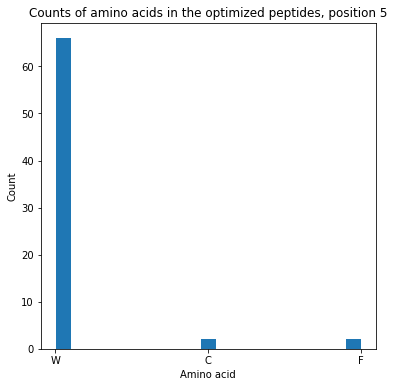

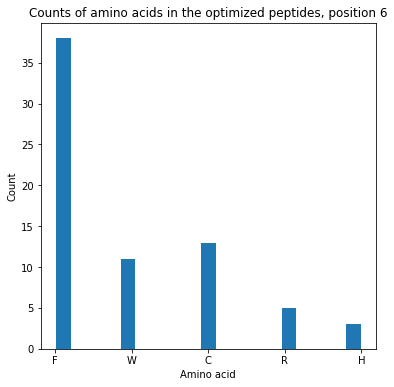

In [262]:
for position in range(6):
    flat_ois = [x[position] for x in sweep.arrays['best_oi']]
    flat_ois_letters = [f.number_to_letter[o] for o in flat_ois]
    #histogram flat ois can have 19 different values
    plt.figure(figsize=(6,6))
    plt.hist(flat_ois_letters, bins=19, rwidth=0.9)
    plt.title('Counts of amino acids in the optimized peptides, position {}'.format(position+1))
    plt.xlabel('Amino acid')
    plt.ylabel('Count')
    plt.show()

In [263]:
sequences = tuple(zip(sweep.arrays['best_oi'], sweep.arrays['best_oi_score']))
sequences = [(f.numbers_to_string(s[0]), s[1]) for s in sequences]

In [264]:
sorted(set(sequences), key=lambda x: x[1], reverse=False)

[('WHQQWW', -22.250082883697218),
 ('WFQLWF', -22.014625256863653),
 ('WFIIWF', -21.814485900407327),
 ('WMQQWC', -21.73384677076143),
 ('WHVMWF', -21.67887697660393),
 ('CHQNWF', -21.553236670338972),
 ('WFKQWF', -21.328469655988286),
 ('CMQKWF', -21.244468452744215),
 ('WHYVWW', -21.241942578080682),
 ('WFQQWF', -21.22782447216776),
 ('WRQLWF', -21.193427353157333),
 ('WHELWC', -21.180418542945056),
 ('WRKIWF', -21.10921859110197),
 ('CRYNCC', -21.00355886102266),
 ('WFDEWF', -20.92396178959256),
 ('WFQKWC', -20.729885680644596),
 ('WRGQWC', -20.47803635884687),
 ('WREIWF', -20.44647912221435),
 ('WHAEWF', -20.430643073705046),
 ('WMQMWW', -20.360140328333262),
 ('WRQLWF', -19.881296212406845),
 ('WFEHWR', -19.818660682516025),
 ('WRQIWF', -19.59103017991295),
 ('WHIMWH', -19.59057064160222),
 ('WFQMWF', -19.570029026488605),
 ('WIWMFF', -19.55680120918307),
 ('WREEWW', -19.545431627148627),
 ('WHQMWR', -19.114517938042628),
 ('WRQKWF', -18.903804498976662)]

# 1002-sweep_6h_er_1qm_oi-1


In [265]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='1002',
    file_name='sweep_6h_er_1qm_oi-1',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'block_n_layers', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'loss_validation_r_squared', 'n_parameters', 'time_train', 'best_oi', 'best_oi_score', 'oi_time'])

In [266]:
# list(zip(sweep.lists['embedding_dim'], sweep.lists['quantum_n_layers'], sweep.lists['quantum_measurement'], sweep.lists['n_parameters']))

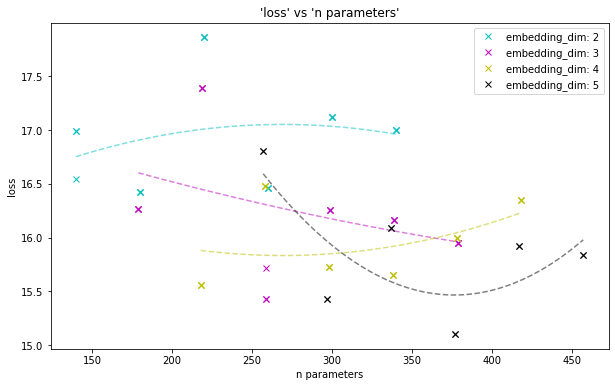

In [267]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation',
    legend_keys=['embedding_dim'],
    fit_degree=2,
    replace=[('loss_validation', 'loss'), ('n_parameters', 'n parameters')],
    fix = [],
    to_string = [],
    colors = [ 'c', 'm', 'y', 'k', 'w']
)

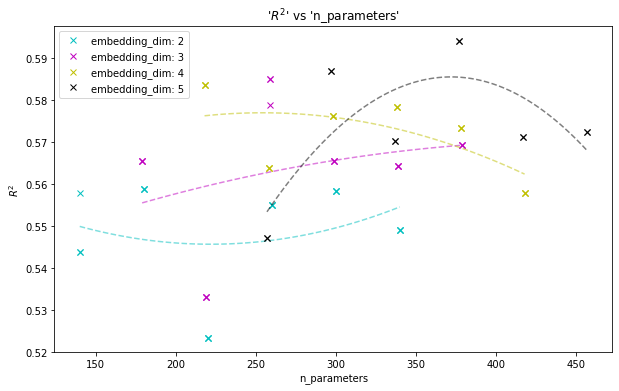

In [268]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation_r_squared',
    legend_keys=['embedding_dim'],
    fit_degree=2,
    replace=[('loss_validation_r_squared', '$R^2$')],
    fix = [],
    to_string = [],
    colors = [ 'c', 'm', 'y', 'k', 'w']
)

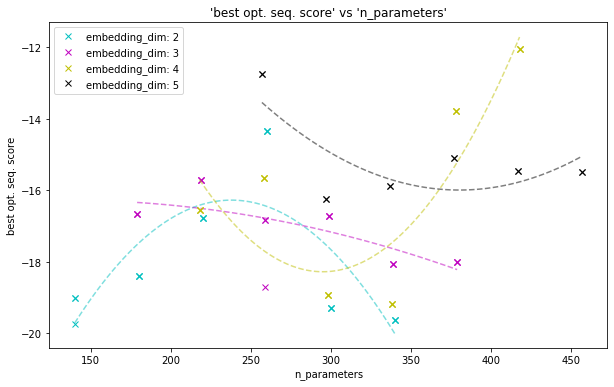

In [269]:
sweep.plot(
    x_key='n_parameters',
    y_key='best_oi_score',
    legend_keys=['embedding_dim'],
    fit_degree=2,
    replace=[('best_oi_score', 'best opt. seq. score')],
    fix = [],
    to_string = [],
    colors = [ 'c', 'm', 'y', 'k', 'w']
)

In [270]:
flat_ois = sweep.arrays['best_oi'].flatten()
flat_ois_letters = [f.number_to_letter[o] for o in flat_ois]

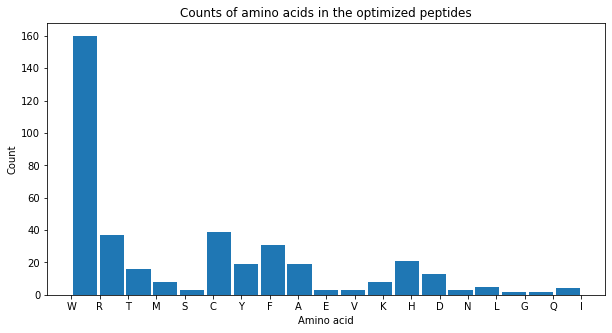

In [271]:
#histogram flat ois can have 19 different values
plt.figure(figsize=(10,5))
plt.hist(flat_ois_letters, bins=19, rwidth=0.9)
plt.title('Counts of amino acids in the optimized peptides')
plt.xlabel('Amino acid')
plt.ylabel('Count')
plt.show()

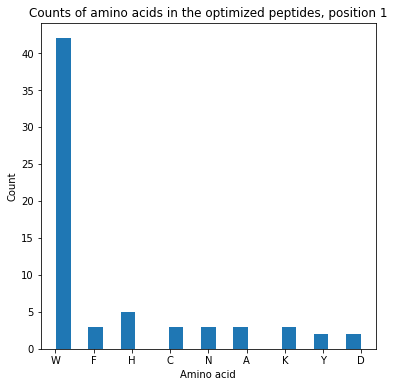

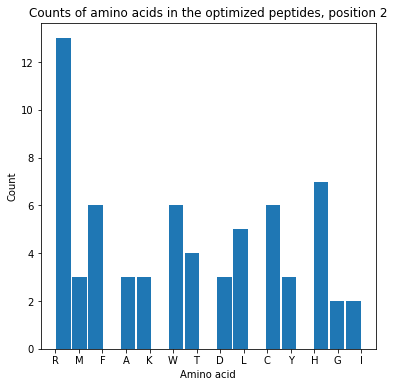

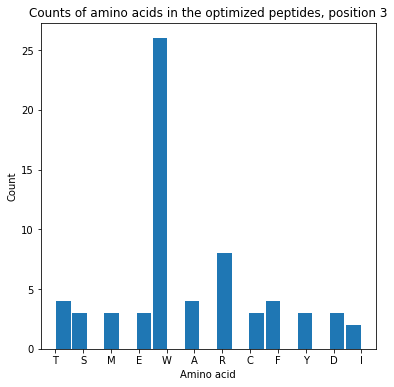

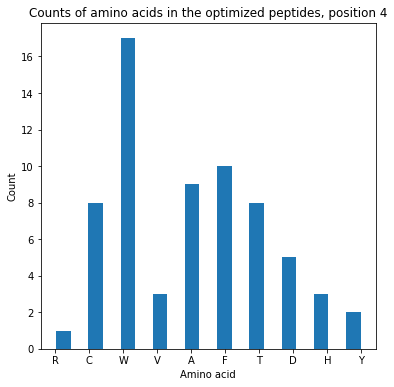

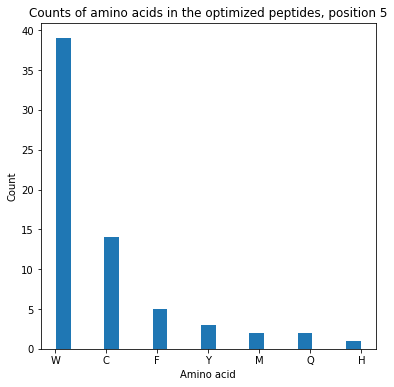

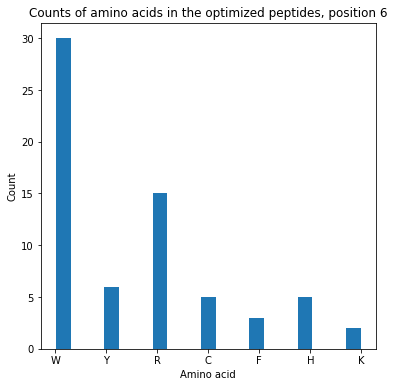

In [272]:
for position in range(6):
    flat_ois = [x[position] for x in sweep.arrays['best_oi']]
    flat_ois_letters = [f.number_to_letter[o] for o in flat_ois]
    #histogram flat ois can have 19 different values
    plt.figure(figsize=(6,6))
    plt.hist(flat_ois_letters, bins=19, rwidth=0.9)
    plt.title('Counts of amino acids in the optimized peptides, position {}'.format(position+1))
    plt.xlabel('Amino acid')
    plt.ylabel('Count')
    plt.show()

In [273]:
sequences = tuple(zip(sweep.arrays['best_oi'], sweep.arrays['best_oi_score']))
sequences = [(f.numbers_to_string(s[0]), s[1]) for s in sequences]

In [274]:
sorted(set(sequences), key=lambda x: x[1], reverse=False)

[('WRTRWW', -19.737435891222084),
 ('FKWFYF', -19.62926008003084),
 ('WRWAWC', -19.29337372311365),
 ('WYYWWW', -19.178703051579088),
 ('WHWFWW', -19.01356495535503),
 ('WFFHWW', -18.943008628531842),
 ('WTFWHW', -18.72083464963658),
 ('WMSCWY', -18.41404301245236),
 ('WTRTWR', -18.082072090174172),
 ('WDCTWR', -18.025383175877558),
 ('WWAFWW', -16.82475048631311),
 ('WFMWCW', -16.79136348861842),
 ('CRRAWW', -16.71953599674354),
 ('HRTFWR', -16.658779575556515),
 ('NLWWCW', -16.54882758447235),
 ('WWAYWW', -16.246573897340422),
 ('YHWCQH', -15.880137446463186),
 ('WRWAWH', -15.725683028065141),
 ('WCWDWR', -15.669082366399612),
 ('WIITCC', -15.483900384788111),
 ('DLWWWW', -15.47677546571768),
 ('WWWDFK', -15.097008550061105),
 ('WAEVFR', -14.348632980616534),
 ('ACWCCW', -13.775591375418578),
 ('HGRWMW', -12.755510554917347),
 ('KHDWCY', -12.047165114077504)]

# 1003-sweep_6h_e_Aqm_oi-1

In [275]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='1003',
    file_name='sweep_6h_e_Aqm_oi-1',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'ansatz', 'block_n_layers', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'loss_validation_r_squared', 'n_parameters', 'time_train', 'best_oi', 'best_oi_score', 'oi_time'])

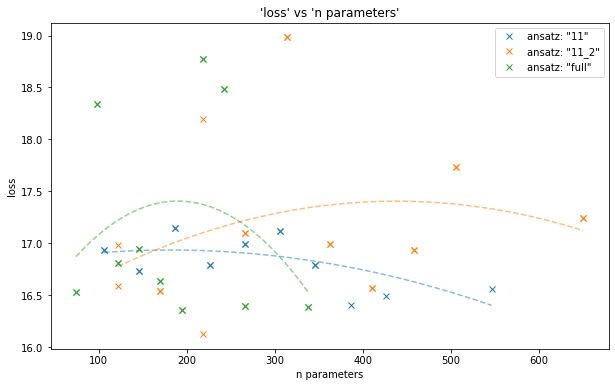

In [276]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation',
    legend_keys=['ansatz'],
    fit_degree=2,
    replace=[
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11'>", '11'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11_2'>", '11_2'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_full_conn'>", 'full'),
        ('loss_validation', 'loss'),        
        ('n_parameters', 'n parameters'),

    ],
    fix = [],
    to_string=['ansatz'],
)

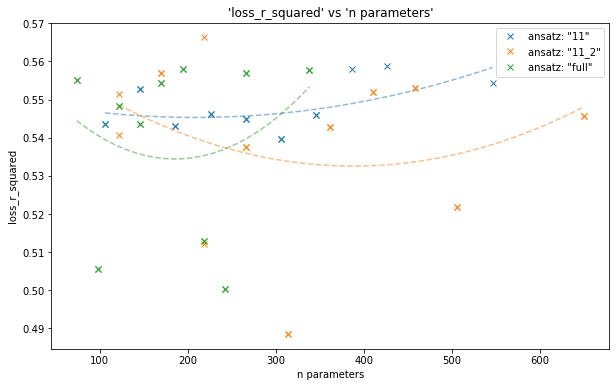

In [277]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation_r_squared',
    legend_keys=['ansatz'],
    fit_degree=2,
    replace=[
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11'>", '11'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11_2'>", '11_2'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_full_conn'>", 'full'),
        ('loss_validation', 'loss'),        
        ('n_parameters', 'n parameters'),

    ],
    fix = [],
    to_string=['ansatz'],
)

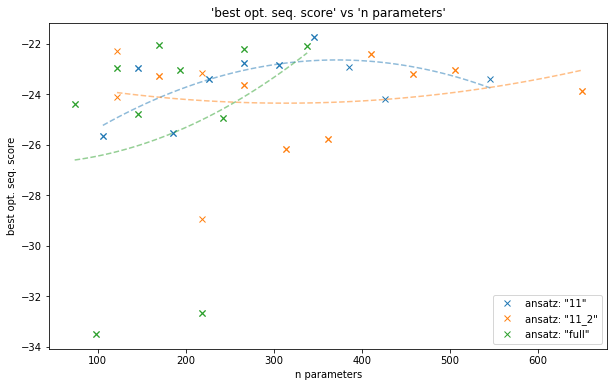

In [278]:
sweep.plot(
    x_key='n_parameters',
    y_key='best_oi_score',
    legend_keys=['ansatz'],
    fit_degree=2,
    replace=[
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11'>", '11'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_11_2'>", '11_2'), 
        ("<class 'my_code.quantum_nodes.parts.Ansatz_full_conn'>", 'full'),
        ('best_oi_score', 'best opt. seq. score'),
        ('n_parameters', 'n parameters'),
    ],
    fix = [],
    to_string=['ansatz'],
)

In [279]:
sequences = tuple(zip(sweep.arrays['best_oi'], sweep.arrays['best_oi_score']))
sequences = [(f.numbers_to_string(s[0]), s[1]) for s in sequences]
sorted(set(sequences), key=lambda x: x[1], reverse=False)

[('WWWWWW', -33.49111082117721),
 ('WWCWWC', -32.650496622095865),
 ('WHCCCC', -28.93972202938475),
 ('WCHWCC', -26.167554972942156),
 ('WCHCWH', -25.782092858212057),
 ('WWFEWW', -25.64289457366511),
 ('WCFFCC', -25.525972609561638),
 ('WHHWWW', -24.917313035680337),
 ('WCRFWC', -24.79108527945226),
 ('WFWWFH', -24.37715253682002),
 ('WFQKWF', -24.182433583748626),
 ('WFFFCC', -24.094987428463664),
 ('WFVCWF', -23.878366202131875),
 ('WFRMWW', -23.622993791135023),
 ('WWHHWW', -23.408484774192566),
 ('WFMMWF', -23.401039443740615),
 ('CFLLWF', -23.272678621655647),
 ('WFLMCF', -23.19058560216999),
 ('WRFHWF', -23.141755850899152),
 ('WFVNWW', -23.05018689110731),
 ('WFEIWF', -23.0483184855587),
 ('WHWCFC', -22.969399122184438),
 ('WFHFWW', -22.93770076161056),
 ('WHELWF', -22.926091477929056),
 ('WFKAWW', -22.827876492576298),
 ('WFHRWF', -22.74292077697054),
 ('WFYIWC', -22.38343198500231),
 ('WFMIWF', -22.267436365822313),
 ('WFLMWF', -22.19961552781),
 ('WFQKWF', -22.06924922544302

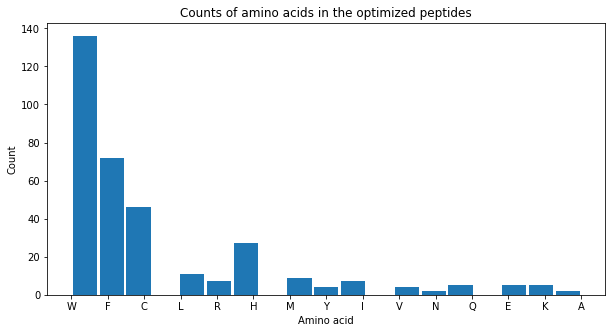

In [281]:
flat_ois = sweep.arrays['best_oi'].flatten()
flat_ois_letters = [f.number_to_letter[o] for o in flat_ois]
#histogram flat ois can have 19 different values
plt.figure(figsize=(10,5))
plt.hist(flat_ois_letters, bins=19, rwidth=0.9)
plt.title('Counts of amino acids in the optimized peptides')
plt.xlabel('Amino acid')
plt.ylabel('Count')
plt.show()

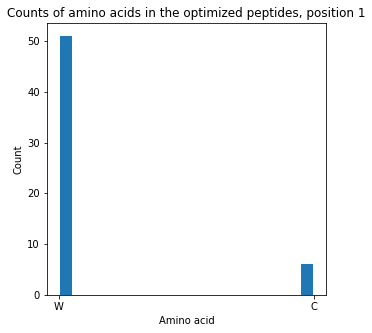

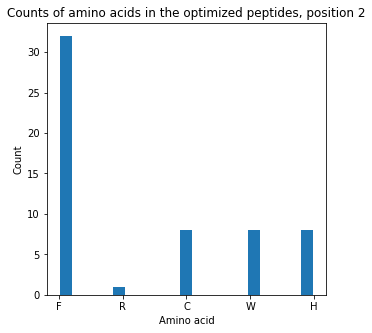

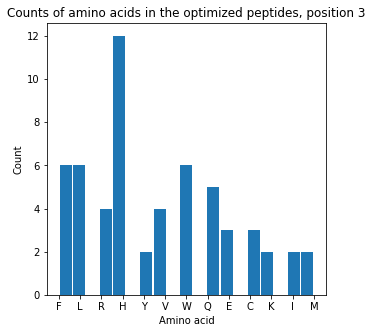

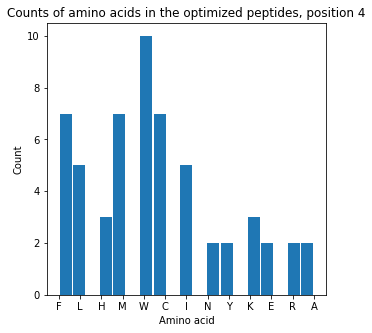

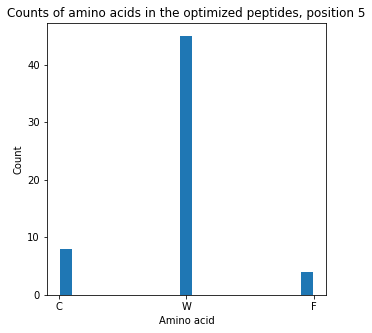

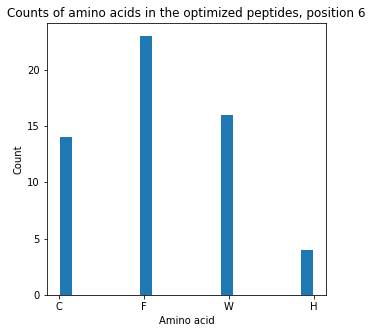

In [280]:
for position in range(6):
    flat_ois = [x[position] for x in sweep.arrays['best_oi']]
    flat_ois_letters = [f.number_to_letter[o] for o in flat_ois]
    #histogram flat ois can have 19 different values
    plt.figure(figsize=(5,5))
    plt.hist(flat_ois_letters, bins=19, rwidth=0.9)
    plt.title('Counts of amino acids in the optimized peptides, position {}'.format(position+1))
    plt.xlabel('Amino acid')
    plt.ylabel('Count')
    plt.show()